# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL for Weather Map API Call

base_url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Imperial"

#creating empty arrays to hold desired data
Cities_list = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat =[]
Lng =[]
Max_temp = []
Wind_Speed = []

print('''Beginning Data Retrieval
----------------------------''')

#creating a counter to count city number being processed
city_counter = 1

#Looping through all cities in the list
for city in cities:
    
    # Build query URL based on current element in units
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    print(f'Processing City {city_counter} of {len(cities)} | {city}')

    # Get weather data and store in Json format
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    #exception handling when data is not found
    try:
        
        #retrive desired data set and keep appending to the respective arrays
        w_Cloudiness = weather_json["clouds"]["all"]
        Cloudiness.append(w_Cloudiness)
    
        w_Country = weather_json["sys"]["country"]
        Country.append(w_Country)
    
        w_Date = weather_json["dt"]
        Date.append(w_Date)
    
        w_Humidity = weather_json["main"]["humidity"]
        Humidity.append(w_Humidity)
    
        w_Lat = weather_json["coord"]["lat"]
        Lat.append(w_Lat)
    
        w_Lng = weather_json["coord"]["lon"]
        Lng.append(w_Lng)
    
        w_Max_temp = weather_json["main"]["temp_max"]
        Max_temp.append(w_Max_temp)
    
        w_Wind_Speed = weather_json["wind"]["speed"]
        Wind_Speed.append(w_Wind_Speed)
    
        Cities_list.append(city)

        city_counter = city_counter + 1
    
    except KeyError:
        print(f"City not found. Skipping {city}...")
    
print('''---------------------
Data Retrieval Complete
---------------------''')

Beginning Data Retrieval
----------------------------
Processing City 1 of 627 | cherskiy
Processing City 2 of 627 | jamestown
Processing City 3 of 627 | bang saphan
Processing City 4 of 627 | vaini
Processing City 5 of 627 | ushuaia
Processing City 6 of 627 | amderma
City not found. Skipping amderma...
Processing City 6 of 627 | rongcheng
Processing City 7 of 627 | ouro preto do oeste
Processing City 8 of 627 | safaga
Processing City 9 of 627 | punta arenas
Processing City 10 of 627 | cairns
Processing City 11 of 627 | maun
Processing City 12 of 627 | aklavik
Processing City 13 of 627 | rikitea
Processing City 14 of 627 | yarkovo
Processing City 15 of 627 | cabo san lucas
Processing City 16 of 627 | qaanaaq
Processing City 17 of 627 | manyana
Processing City 18 of 627 | badiraguato
Processing City 19 of 627 | kapaa
Processing City 20 of 627 | goderich
Processing City 21 of 627 | puerto ayora
Processing City 22 of 627 | hithadhoo
Processing City 23 of 627 | shimoda
Processing City 24 o

Processing City 194 of 627 | arlit
Processing City 195 of 627 | kalabo
Processing City 196 of 627 | bilibino
Processing City 197 of 627 | seguela
Processing City 198 of 627 | saint anthony
Processing City 199 of 627 | norman wells
Processing City 200 of 627 | celestun
Processing City 201 of 627 | kiama
Processing City 202 of 627 | kamenka
Processing City 203 of 627 | palabuhanratu
City not found. Skipping palabuhanratu...
Processing City 203 of 627 | fortuna
Processing City 204 of 627 | san jose
Processing City 205 of 627 | wangqing
Processing City 206 of 627 | baindur
Processing City 207 of 627 | el sauce
Processing City 208 of 627 | tortoli
Processing City 209 of 627 | santa maria
Processing City 210 of 627 | grindavik
Processing City 211 of 627 | saint george
Processing City 212 of 627 | dire
Processing City 213 of 627 | saskylakh
Processing City 214 of 627 | geraldton
Processing City 215 of 627 | erzin
Processing City 216 of 627 | pitimbu
Processing City 217 of 627 | mar del plata


Processing City 369 of 627 | mexico
Processing City 370 of 627 | usolye
Processing City 371 of 627 | oranjemund
Processing City 372 of 627 | nabire
Processing City 373 of 627 | iquira
Processing City 374 of 627 | nelson bay
Processing City 375 of 627 | ngukurr
City not found. Skipping ngukurr...
Processing City 375 of 627 | tuatapere
Processing City 376 of 627 | tumannyy
City not found. Skipping tumannyy...
Processing City 376 of 627 | siloam springs
Processing City 377 of 627 | macomb
Processing City 378 of 627 | solovetskiy
City not found. Skipping solovetskiy...
Processing City 378 of 627 | loveland
Processing City 379 of 627 | berlevag
Processing City 380 of 627 | mount gambier
Processing City 381 of 627 | shkotovo-22
City not found. Skipping shkotovo-22...
Processing City 381 of 627 | umzimvubu
City not found. Skipping umzimvubu...
Processing City 381 of 627 | matagami
Processing City 382 of 627 | pandamatenga
Processing City 383 of 627 | sovetskaya
Processing City 384 of 627 | ts

Processing City 549 of 627 | okakarara
Processing City 550 of 627 | yatou
Processing City 551 of 627 | tadine
Processing City 552 of 627 | southbridge
Processing City 553 of 627 | rafai
Processing City 554 of 627 | taltal
Processing City 555 of 627 | ribas do rio pardo
Processing City 556 of 627 | trairi
Processing City 557 of 627 | peterhead
Processing City 558 of 627 | ancud
Processing City 559 of 627 | juegang
Processing City 560 of 627 | kieta
Processing City 561 of 627 | faanui
Processing City 562 of 627 | kuusamo
Processing City 563 of 627 | tukrah
Processing City 564 of 627 | presidencia roque saenz pena
Processing City 565 of 627 | petroton
City not found. Skipping petroton...
Processing City 565 of 627 | chicama
Processing City 566 of 627 | kyshtovka
Processing City 567 of 627 | quatre cocos
Processing City 568 of 627 | derzhavinsk
Processing City 569 of 627 | cortes
Processing City 570 of 627 | bombay
Processing City 571 of 627 | chagda
City not found. Skipping chagda...
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating a dataFrame

weather_df = pd.DataFrame({
     'City':Cities_list,
     'Cloudiness':Cloudiness,
     'Country':Country,
     'Date':Date,
     'Humidity':Humidity,
     'Lat':Lat,
     'Lng':Lng,
     'Max Temp':Max_temp,
     'Wind Speed':Wind_Speed,
     })

#writing DF output to CSV file
weather_df.to_csv(output_data_file)

#Getting the count of data
weather_df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [ ]:
weather_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

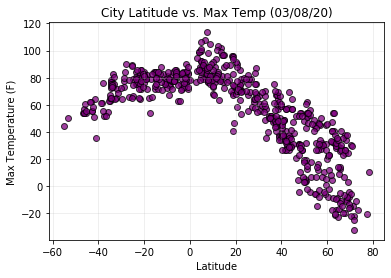

In [6]:
# Creating a function that takes y-axis values from the Weather DataFrame and creates a Scatter plot

def scatter_plot_by_lat(y_axis_values,y_axis_label):
    Plot_Data = plt.scatter(weather_df['Lat'],weather_df[y_axis_values],alpha=0.75,facecolors = 'purple', edgecolors='black')
    
    #title that also shows the current date using a function from time module     
    plt.title(f"City Latitude vs. {y_axis_values} ({time.strftime('%m/%d/%y')})")
    
    #Labels     
    plt.xlabel('Latitude')
    plt.ylabel(y_axis_label)
    plt.grid(alpha = 0.25)
    
    #saving image
    plt.savefig(f'output_data/Latitude_vs_{y_axis_values}.png')
    
#calling the Scatterplot function for Max Temparature values     
lat_vs_temp = scatter_plot_by_lat('Max Temp','Max Temperature (F)')
plt.show()

### Latitude Vs Max Temperature Plot Analysis

* Temperatures increase when we approach the equator
* Cities in Southern Hemisphere have higher temperatures than those at similar latitudes in the Northern Hemisphere

#### Latitude vs. Humidity Plot

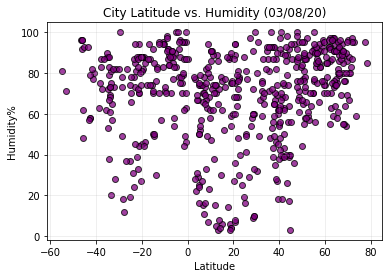

In [7]:
#calling the Scatterplot function for Humidity values     
lat_vs_temp = scatter_plot_by_lat('Humidity','Humidity%')
plt.show()

### Latitude Vs Humidity Plot Analysis

* There is no such visible positive or negative correlation between Latitude and humidity %

#### Latitude vs. Cloudiness Plot

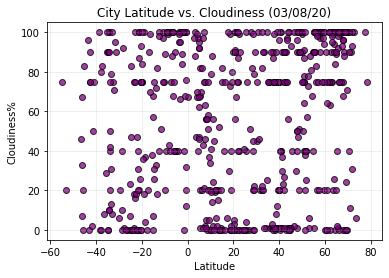

In [8]:
#calling the Scatterplot function for Cloudiness values     
lat_vs_temp = scatter_plot_by_lat('Cloudiness','Cloudiness%')
plt.show()

### Latitude Vs Cloudiness Plot Analysis

* There is no such visible correlation between the lattitude and Cloudiness%.

#### Latitude vs. Wind Speed Plot

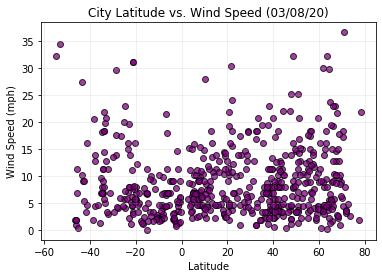

In [9]:
#calling the Scatterplot function for Wind Speed values     
lat_vs_temp = scatter_plot_by_lat('Wind Speed','Wind Speed (mph)')
plt.show()

### Latitude Vs Wind Speed Plot Analysis

* There is no such visible correlation between the lattitude and Wind Speed.

## Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
Northern = weather_df.loc[weather_df["Lat"]>=0]
Southern = weather_df.loc[weather_df["Lat"]<0]
Northern.name = 'Northern'
Southern.name = 'Southern'

# Creating a function that takes y-axis values from the corresponding DataFrame and creates a Linear Regression model

def linRegress_plot_by_lat(df_name,y_axis_values,y_axis_label):
    Plot_Data = plt.scatter(df_name['Lat'],df_name[y_axis_values],alpha=0.75,facecolors = 'purple', edgecolors='black')
    
    # Perform a linear regression with latitude as x values and get y values from function parameter
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df_name['Lat'], df_name[y_axis_values])

    # Get regression values
    regress_values = df_name['Lat'] * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #title that also shows the current date using a function from time module     
    plt.title(f"{df_name.name} Hemisphere - {y_axis_label} vs. Latitude Linear Regression ({time.strftime('%m/%d/%y')})")
    plt.plot(df_name['Lat'],regress_values,"r-")
    x_annonate = min(df_name['Lat']) + 10
    y_annonate = min(df_name[y_axis_values]) + 30
    plt.annotate(line_eq,(x_annonate,y_annonate),fontsize=10,color="red")
    print(f"The r-squared is: {rvalue}")
    print(f"The Line Equation is: {line_eq}")
    
    #Labels     
    plt.xlabel('Latitude')
    plt.ylabel(y_axis_label)
    plt.grid(alpha = 0.25)
    
    #saving image
    plt.savefig(f'output_data/{df_name.name} Hemisphere {y_axis_values}_vs_Latitude_Linear_Regression.png')
    
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8718879191360978
The Line Equation is: y = -1.37x +100.77


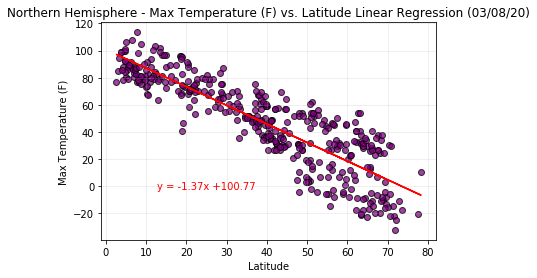

In [20]:
linRegress_plot_by_lat(Northern,'Max Temp','Max Temperature (F)')
plt.show()

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression Plot Analysis

* The linear regression model shows a  downward sloping line, hence the conclusion is that the decrease in temperature is due to the increase in lattitude. Hence , as we move away from the equator it gets colder.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6314678759483647
The Line Equation is: y = 0.47x +83.82


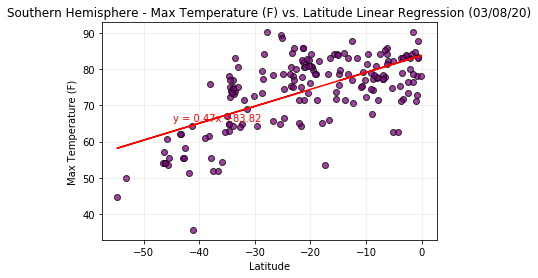

In [21]:
linRegress_plot_by_lat(Southern,'Max Temp','Max Temperature (F)')
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression Plot Analysis

* The linear regression model shows an  upward sloping line, hence the conclusion is that the increase in temperature is due to the increase in lattitude. Hence , as we approach the equator it gets hotter.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4238242939159794
The Line Equation is: y = 0.49x +49.16


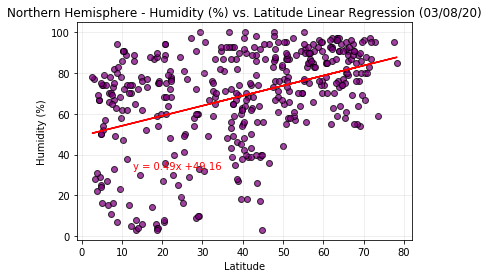

In [22]:
linRegress_plot_by_lat(Northern,'Humidity','Humidity (%)')
plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot Analysis
The linear regression model shows a slight relationship between humidity% and latitude,however it is not significant to draw any conclusion.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16327208386624165
The Line Equation is: y = 0.23x +79.12


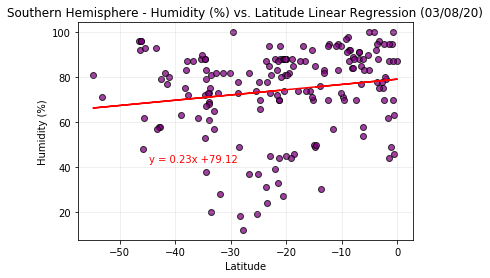

In [23]:
linRegress_plot_by_lat(Southern,'Humidity','Humidity (%)')
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot Analysis

* The linear regression model shows a R-squared value of 0.16 between humidity% and latitude, which is not significant to draw any relationship between the two.
* As we approach the equator the humidity% values are in a specific range(60-100) , whereas as we go far from the equator, there is more variance in the range of humidity percentage.
* There seems to be more cities from northern hemisphere in the data points as compared to the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26553580008547856
The Line Equation is: y = 0.49x +36.06


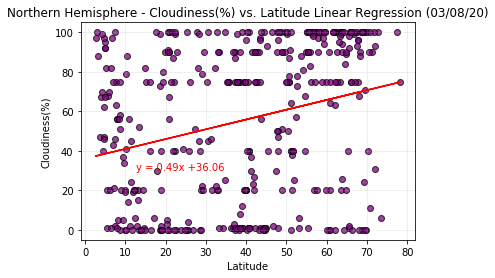

In [24]:
linRegress_plot_by_lat(Northern,'Cloudiness','Cloudiness(%)')
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot Analysis
* The r-squared is 0.26 ; there does not seem to be any relationship between the Cloudiness % and Lattitudes to draw any conclusion.
* From the linear regression model it looks like the points are linearly spreadout , following no patterns.



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28599656836915816
The Line Equation is: y = 0.79x +71.99


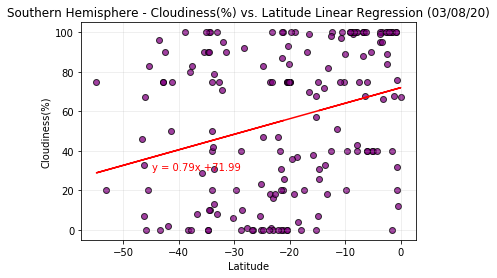

In [25]:
linRegress_plot_by_lat(Southern,'Cloudiness','Cloudiness(%)')
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot Analysis
* There is no significant relationship between the Cloudiness % and Lattitudes to draw any conclusion.
* There seems to be less cities from southern hemisphere in the data points as compared to the northern hemisphere, which makes it difficult to draw any comparison between the two graphs.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08640745965171998
The Line Equation is: y = 0.03x +8.03


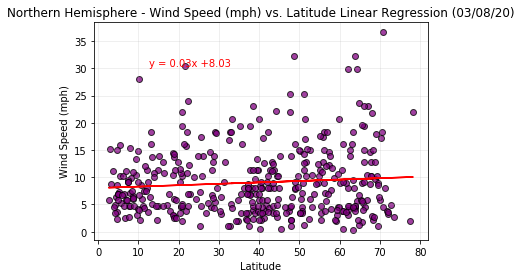

In [26]:
linRegress_plot_by_lat(Northern,'Wind Speed','Wind Speed (mph)')
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot Analysis
* The linear regression model is almost a paralell line , shoing that there is no relationship between the Wind Speed and Lattitudes.
* The wind speeds tend to be lower around 5 mph for most of the cities in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.33230765744822743
The Line Equation is: y = -0.16x +4.65


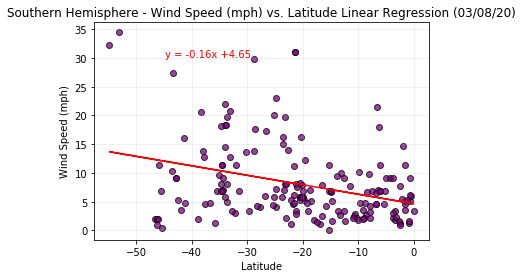

In [27]:
linRegress_plot_by_lat(Southern,'Wind Speed','Wind Speed (mph)')
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot Analysis
There is a slight downward sloping relationship between the Wind Speed and Lattitudes in Southern hemisphere, which shows that as we approach the equator line in southern hemisphere, the wind speed tends to decreases.